In [22]:
# This serves as a template which will guide you through the implementation of this task.  It is advised
# to first read the whole template and get a sense of the overall structure of the code before trying to fill in any of the TODO gaps
# First, we import necessary libraries:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer




In [24]:

def data_loading():
    """
    This function loads the training and test data, preprocesses it, removes the NaN values and interpolates the missing
    data using imputation

    Parameters
    ----------
    Returns
    ----------
    X_train: matrix of floats, training input with features
    y_train: array of floats, training output with labels
    X_test: matrix of floats: dim = (100, ?), test input with features
    """
    # Load training data
    train_df = pd.read_csv("train.csv")

    print("Training data:")
    print("Shape:", train_df.shape)
    print(train_df.head(2))
    print('\n')

    # Load test data
    test_df = pd.read_csv("test.csv")

    print("Test data:")
    print(test_df.shape)
    print(test_df.head(2))

    #drop rows where y_train = NaN
    train_df = train_df.dropna(axis=0,subset='price_CHF')

    #change season string to int
    mapping = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
    train_df.replace({'season': mapping})
    test_df.replace({'season': mapping})

    #impute the training and test data
    test_df = impute(test_df)
    train_df = impute(train_df)

    # Dummy initialization of the X_train, X_test and y_train
    X_train = np.zeros_like(train_df.drop(['price_CHF'],axis=1))
    y_train = np.zeros_like(train_df['price_CHF'])
    X_test = np.zeros_like(test_df)


    assert (X_train.shape[1] == X_test.shape[1]) and (X_train.shape[0] == y_train.shape[0]) and (X_test.shape[0] == 100), "Invalid data shape"
    X_train, y_train, X_test

In [25]:

def modeling_and_prediction(X_train, y_train, X_test):
    """
    This function defines the model, fits training data and then does the prediction with the test data

    Parameters
    ----------
    X_train: matrix of floats, training input with 10 features
    y_train: array of floats, training output
    X_test: matrix of floats: dim = (100, ?), test input with 10 features

    Returns
    ----------
    y_test: array of floats: dim = (100,), predictions on test set
    """

    y_pred=np.zeros(X_test.shape[0])
    #TODO: Define the model and fit it using training data. Then, use test data to make predictions

    assert y_pred.shape == (100,), "Invalid data shape"
    return y_pred

In [1]:

# Main function. You don't have to change this
if __name__ == "__main__":
    # Data loading
    X_train, y_train, X_test = data_loading()
    # The function retrieving optimal LR parameters
    y_pred=modeling_and_prediction(X_train, y_train, X_test)
    # Save results in the required format
    dt = pd.DataFrame(y_pred)
    dt.columns = ['price_CHF']
    dt.to_csv('results.csv', index=False)
    print("\nResults file successfully generated!")



NameError: name 'data_loading' is not defined

In [0]:
    train_df = pd.read_csv("train.csv")

    print("Training data:")
    print("Shape:", train_df.shape)
    print(train_df.head(2))
    print('\n')

    test_df = pd.read_csv("test.csv")

    print("Test data:")
    print(test_df.shape)
    print(test_df.head(2))

In [4]:
imp = IterativeImputer(max_iter=10, random_state=0)

Training data:
Shape: (900, 11)
   season  price_AUS  price_CHF  price_CZE  price_GER  price_ESP  price_FRA  \
0  spring        NaN   9.644028  -1.686248  -1.748076  -3.666005        NaN   
1  summer        NaN   7.246061  -2.132377  -2.054363  -3.295697  -4.104759   

   price_UK  price_ITA  price_POL  price_SVK  
0 -1.822720  -3.931031        NaN  -3.238197  
1 -1.826021        NaN        NaN  -3.212894  


Test data:
(100, 10)
   season  price_AUS  price_CZE  price_GER  price_ESP  price_FRA  price_UK  \
0  spring        NaN   0.472985   0.707957        NaN  -1.136441 -0.596703   
1  summer  -1.184837   0.358019        NaN  -3.199028  -1.069695       NaN   

   price_ITA  price_POL  price_SVK  
0        NaN   3.298693   1.921886  
1  -1.420091   3.238307        NaN  


In [14]:
for name in list(train_df):
    v = train_df[name].isna().sum()
    print(f'{name}: {v}')




season: 0
price_AUS: 262
price_CHF: 269
price_CZE: 268
price_GER: 269
price_ESP: 269
price_FRA: 264
price_UK: 287
price_ITA: 266
price_POL: 265
price_SVK: 281


<AxesSubplot: >

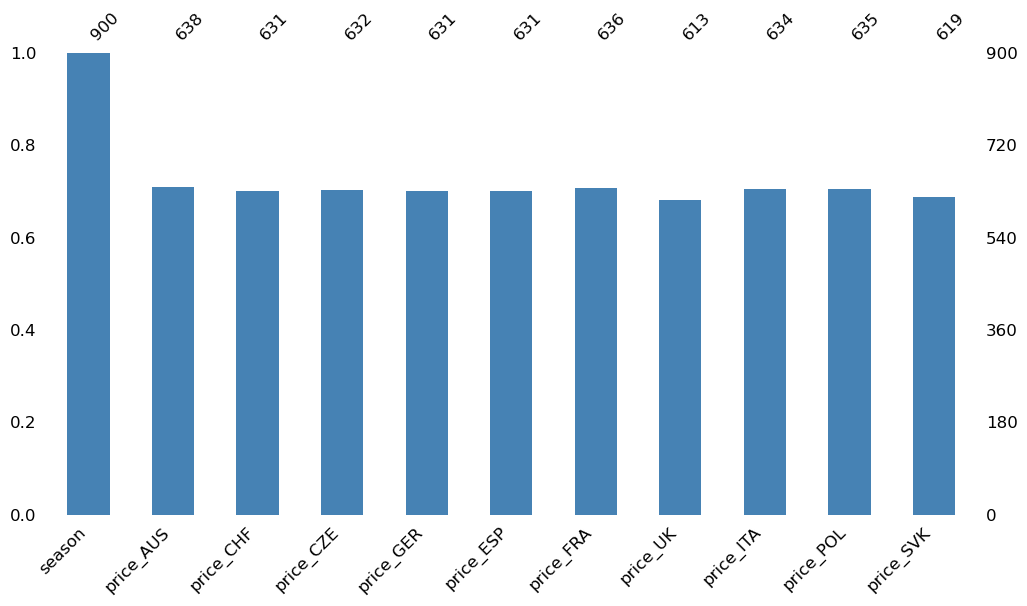

In [18]:
msno.bar(train_df, figsize=(12, 6), fontsize=12, color='steelblue')
# season is complete rest of data is missing evenly, dropping empty rows results in len(train_df.dropna()) =0

In [27]:
data_loading

<function __main__.data_loading()>

In [28]:
    train_df = pd.read_csv("train.csv")

    print("Training data:")
    print("Shape:", train_df.shape)
    print(train_df.head(2))
    print('\n')

    # Load test data
    test_df = pd.read_csv("test.csv")

    print("Test data:")
    print(test_df.shape)
    print(test_df.head(2))

    #drop rows where y_train = NaN
    train_df = train_df.dropna(axis=0,subset='price_CHF')

    #change season string to int
    mapping = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
    train_df.replace({'season': mapping})
    test_df.replace({'season': mapping})

    #impute the training and test data
    test_df = impute(test_df)
    train_df = impute(train_df)

    # Dummy initialization of the X_train, X_test and y_train
    X_train = np.zeros_like(train_df.drop(['price_CHF'],axis=1))
    y_train = np.zeros_like(train_df['price_CHF'])
    X_test = np.zeros_like(test_df)


    assert (X_train.shape[1] == X_test.shape[1]) and (X_train.shape[0] == y_train.shape[0]) and (X_test.shape[0] == 100), "Invalid data shape"
    X_train, y_train, X_test

Training data:
Shape: (900, 11)
   season  price_AUS  price_CHF  price_CZE  price_GER  price_ESP  price_FRA  \
0  spring        NaN   9.644028  -1.686248  -1.748076  -3.666005        NaN   
1  summer        NaN   7.246061  -2.132377  -2.054363  -3.295697  -4.104759   

   price_UK  price_ITA  price_POL  price_SVK  
0 -1.822720  -3.931031        NaN  -3.238197  
1 -1.826021        NaN        NaN  -3.212894  


Test data:
(100, 10)
   season  price_AUS  price_CZE  price_GER  price_ESP  price_FRA  price_UK  \
0  spring        NaN   0.472985   0.707957        NaN  -1.136441 -0.596703   
1  summer  -1.184837   0.358019        NaN  -3.199028  -1.069695       NaN   

   price_ITA  price_POL  price_SVK  
0        NaN   3.298693   1.921886  
1  -1.420091   3.238307        NaN  


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=object),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0

In [34]:
    mapping = {'spring': 1, 'summer': 2, 'autumn': 3, 'winter': 4}
    test_df.replace({'season': mapping})

,season,price_AUS,price_CZE,price_GER,price_ESP,price_FRA,price_UK,price_ITA,price_POL,price_SVK
0,1,NaN,0.472985,0.707957,NaN,-1.136441,-0.596703,NaN,3.298693,1.921886
1,2,-1.184837,0.358019,NaN,-3.199028,-1.069695,NaN,-1.420091,3.238307,NaN
2,3,-1.116459,NaN,0.780460,-3.338948,-1.053149,-0.586339,NaN,3.207398,2.020570
3,4,NaN,0.353066,0.833429,NaN,-1.322626,-0.628873,-1.304240,3.159858,NaN
4,1,NaN,0.269644,NaN,-3.245495,-1.362051,-0.717914,-1.341538,3.205007,NaN
...,...,...,...,...,...,...,...,...,...,...
95,4,-2.030894,NaN,-1.332104,-3.838154,NaN,-2.319565,NaN,-2.134084,-2.880557
96,1,-1.817763,NaN,NaN,-3.995247,-3.760752,NaN,-3.903510,-2.269992,-3.007311
97,2,NaN,NaN,-1.140538,-4.084448,-3.968988,-2.555133,-4.058773,-2.146487,-2.816678
98,3,NaN,-1.029762,NaN,-4.216490,-3.705548,-2.487751,-3.745480,NaN,-2.849707


900